## 기본 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
plt.rc('font', family='NanumBarunGothic') 

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (5,389 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 129502 files and di

# 세팅

## KOSPI

In [3]:
# KOSPI 데이터 불러오기 
kospi = pd.read_csv('/content/drive/MyDrive/DSL/kospi_data.csv')

In [4]:
kospi['Close_lag'] = kospi['Close'].shift(1)
kospi['Log_Rate'] = np.log(kospi['Close']/kospi['Close_lag'])

kospi['Date'] = pd.to_datetime(kospi['Date'])
kospi['Month'] = [x.month for x in kospi['Date']]
kospi['Day'] = [x.day for x in kospi['Date']]
kospi['Year'] = [x.year for x in kospi['Date']]
kospi['Weekday'] = kospi['Date'].dt.dayofweek
rate = kospi.groupby(['Year', 'Month'])['Log_Rate'].sum()
kospi_change = rate.reset_index()


##KOSDAQ

In [5]:
kosdaq = pd.read_csv('/content/drive/MyDrive/DSL/kosdaq_data.csv')
kosdaq.head()

,Date,Close,Change,Fluctuation,Open,High,Low,Volume,Transaction,Market_cap
0,2023.1.19,712.89,1.14,0.16,707.66,712.94,705.76,1008733,6275313.0,332000000.0
1,2023.1.18,711.75,2.04,0.29,711.12,713.28,708.79,1175236,6534155.0,331000000.0
2,2023.1.17,709.71,-7.18,-1.00,716.70,718.90,708.54,1162083,6282539.0,330000000.0
3,2023.1.16,716.89,5.07,0.71,714.71,718.15,713.19,1230666,5646744.0,333000000.0
4,2023.1.13,711.82,1.00,0.14,712.24,714.75,709.26,1082282,5228817.0,331000000.0


In [7]:
kosdaq['Close_lag'] = kosdaq['Close'].shift(1)
kosdaq['Log_Rate'] =  (kosdaq['Close']-kosdaq['Close_lag'])/kosdaq['Close_lag'] 


kosdaq['Date'] = pd.to_datetime(kosdaq['Date'])
kosdaq['Month'] = [x.month for x in kosdaq['Date']]
kosdaq['Day'] = [x.day for x in kosdaq['Date']]
kosdaq['Year'] = [x.year for x in kosdaq['Date']]
kosdaq['Weekday'] = kosdaq['Date'].dt.dayofweek

df = pd.DataFrame({'Year':kosdaq['Year'], 
									'Month':kosdaq['Month']}).drop_duplicates(['Year', 'Month'])

rate = kosdaq.groupby(['Year', 'Month'])['Log_Rate'].sum()
df['Monthly_Rate'] = list(rate)
kosdaq_change = rate.reset_index()

## S&P


In [8]:
SP = pd.read_csv('/content/drive/MyDrive/DSL/S&P_data.csv')

In [9]:
#날짜Date 칼럼을 datetime 타입으로 바꾸기
SP['Date'] = pd.to_datetime(SP['Date'])
#Date에서 월과 년만 분리해서 변수 만들기
SP['Month'] = [x.month for x in SP['Date']]
SP['Day'] = [x.day for x in SP['Date']]
SP['Year'] = [x.year for x in SP['Date']]
SP['Weekday'] = SP['Date'].dt.dayofweek

#각 연도와 월에 해당하는 월간수익률을 계산하기 위해 새로운 데이터프레임을 만듭니다
df = pd.DataFrame({'Year':SP['Year'], 
									'Month':SP['Month']}).drop_duplicates(['Year', 'Month'])
#각 연도와 월에 해당하는 로그수익률들만 모아서 합해주면 월간수익률이 얻어집니다.
rate_SP = SP.groupby(['Year', 'Month'])['Log_Rate'].sum()

SP_change = rate.reset_index()

## NASDAQ

In [10]:
nasdaq = pd.read_csv('/content/drive/MyDrive/DSL/nasdaq_data.csv')

In [11]:
#종가를 뒤로 1일 미룬 Close_lag 칼럼 생성
nasdaq['Close_lag'] = nasdaq['Close'].shift(1)

#로그수익률 칼럼 생성
nasdaq['Log_Rate'] = np.log(nasdaq['Close']/nasdaq['Close_lag'])

#수익률 칼럼 생성
nasdaq['Change'] =  (nasdaq['Close']-nasdaq['Close_lag'])/nasdaq['Close_lag'] 
nasdaq

,Date,Open,High,Low,Close,Adj Close,Volume,Close_lag,Log_Rate,Change
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0,NaN,NaN,NaN
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0,100.000000,0.008365,0.008400
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0,100.839996,-0.000794,-0.000793
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0,100.760002,-0.000695,-0.000695
4,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0,100.690002,0.007520,0.007548
...,...,...,...,...,...,...,...,...,...,...
13097,2023-01-11,10794.990234,10932.440430,10762.730469,10931.669922,10931.669922,5284390000,10742.629883,0.017444,0.017597
13098,2023-01-12,10969.259766,11027.750000,10797.120117,11001.099609,11001.099609,5681240000,10931.669922,0.006331,0.006351
13099,2023-01-13,10906.370117,11084.009766,10900.160156,11079.160156,11079.160156,5077990000,11001.099609,0.007071,0.007096
13100,2023-01-17,11070.000000,11145.440430,11024.719727,11095.110352,11095.110352,5138410000,11079.160156,0.001439,0.001440


In [12]:
nasdaq['Date'] = pd.to_datetime(nasdaq['Date'])

nasdaq['Month'] = [x.month for x in nasdaq['Date']]
nasdaq['Day'] = [x.day for x in nasdaq['Date']]
nasdaq['Year'] = [x.year for x in nasdaq['Date']]

nasdaq['Weekday'] = nasdaq['Date'].dt.dayofweek

df = pd.DataFrame({'Year':nasdaq['Year'], 
									'Month':nasdaq['Month']}).drop_duplicates(['Year', 'Month'])

rate = nasdaq.groupby(['Year', 'Month'])['Log_Rate'].sum()
nasdaq_change = rate.reset_index()

# KOSPI

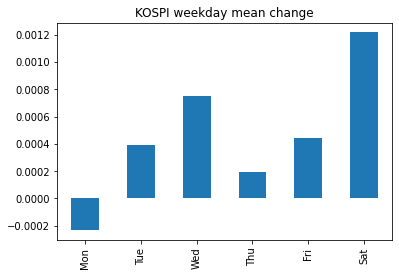

In [13]:
weekday = kospi.groupby('Weekday').mean()
weekday.index = ['Mon','Tue','Wed','Thu','Fri','Sat']

weekday['Change'].plot(kind = 'bar', title = 'KOSPI weekday mean change',
                       figsize = (6,4))
plt.show()

월요일에 실제로 평균 수익률이 가장 낮다



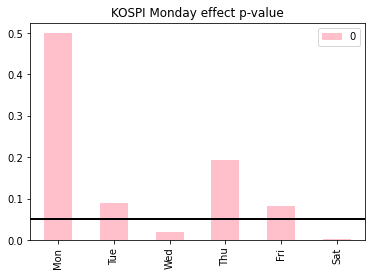

In [14]:
lst = []
for i in range(0, 6): 
  t_stat, p_value = stats.ttest_ind(kospi[kospi['Weekday'] == 0]['Change'], kospi[kospi['Weekday'] == i]['Change'], equal_var=False, alternative= 'less')
  lst.append(p_value)

lst = pd.DataFrame(lst)
lst.index = ['Mon','Tue','Wed','Thu','Fri', 'Sat']
lst.plot(kind='bar', title = 'KOSPI Monday effect p-value', color = 'pink',
         figsize = (6,4))
plt.axhline(0.05, color='black', lw=2)


In [15]:
t_stat, p_value = stats.ttest_ind(kospi[kospi['Weekday'] == 0]['Change'].dropna(), kospi[kospi['Weekday'] != 0]['Change'].dropna(), equal_var=True, alternative= 'less')
print('p_value :', p_value)

p_value : 0.018139640853102733


월요일과 다른 요일들의 평균 T-test 단측검정: p-value < 0.05
-> 월요일 수익률 평균 < 다른 요일 수익률 평균

In [16]:
weekday = pd.DataFrame()
for i in range(0,6): 
  weekday.loc[:,i] = kospi[kospi['Weekday'] == i]['Change'].reset_index().drop(columns = 'index')

for j in range(0,6): # 요일 
  sum = 0
  for i in range(0, len(weekday[j].dropna())): # 요일별 행 
    if weekday.loc[i, j] < 0: 
      sum += 1 
  print(sum / len(weekday[j].dropna()))

0.49876786594381467
0.4948250369640217
0.474592994573261
0.48496796451453916
0.45835386890093643
0.4645760743321719


수익률이 0보다 작을 때를 1로 두고 다 더해서 요일 길이로 나눴을 때는 거의 다 0.5에 수렴. 

# KOSDAQ

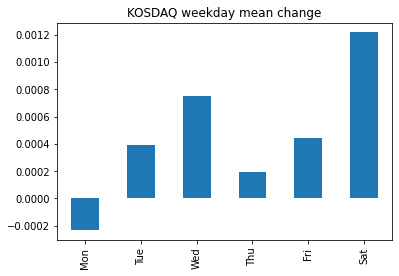

In [17]:
weekday = kospi.groupby('Weekday').mean()
weekday.index = ['Mon','Tue','Wed','Thu','Fri', 'Sat']
weekday['Change'].plot(kind = 'bar', title = 'KOSDAQ weekday mean change',
                       figsize = (6,4))
plt.show()

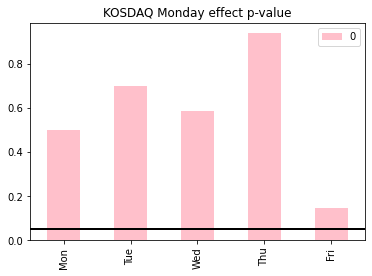

In [18]:
lst = []
for i in range(0, 6): 
  t_stat, p_value = stats.ttest_ind(kosdaq[kosdaq['Weekday'] == 0]['Change'].dropna(), kosdaq[kosdaq['Weekday'] == i]['Change'].dropna(), equal_var=True, alternative= 'less')
  lst.append(p_value)

lst = pd.DataFrame(lst)
lst = lst.drop(5)
lst.index = ['Mon','Tue','Wed','Thu','Fri']
lst.plot(kind='bar', title = 'KOSDAQ Monday effect p-value', color = 'pink',
         figsize = (6,4))
plt.axhline(0.05, color='black', lw=2)

In [19]:
t_stat, p_value = stats.ttest_ind(kospi[kospi['Weekday'] == 0]['Change'].dropna(), kospi[kospi['Weekday'] != 0]['Change'].dropna(), equal_var=False, alternative= 'less')
print('p-value : ', p_value)

p-value :  0.026114237679449995


월요일, 다른 요일 단측검정 T-test p-value < 0.05: 귀무가설 기각 <br>
-> 월요일 평균 수익률 < 다른 요일 평균 수익률 

# S&P 500


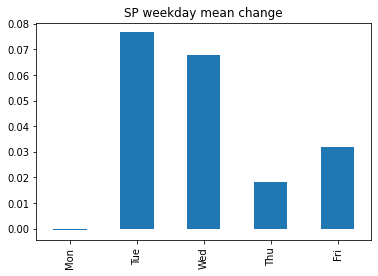

In [20]:
weekday = SP.groupby('Weekday').mean()
weekday.index = ['Mon','Tue','Wed','Thu','Fri']

weekday['Change'].plot(kind = 'bar', title = 'SP weekday mean change',
                       figsize = (6,4))

월요일에 실제로 평균 수익률이 가장 낮다



0 t-statistics : 0.0, p-value : 0.5
1 t-statistics : -2.0707673945165443, p-value : 0.01922019626732419
2 t-statistics : -1.8803678727194453, p-value : 0.030062929729158663
3 t-statistics : -0.5069716622824653, p-value : 0.30610054548159926
4 t-statistics : -0.8934115950767936, p-value : 0.18584387053160267


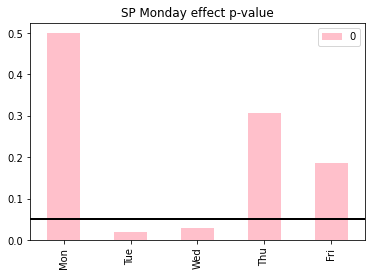

In [21]:
lst = []
for i in range(0, 5): 
  t_stat, p_value = stats.ttest_ind(SP[SP['Weekday'] == 0]['Change'], SP[SP['Weekday'] == i]['Change'], equal_var=True, alternative= 'less')
  lst.append(p_value)
  print(i, "t-statistics : {}, p-value : {}".format(t_stat, p_value))

lst = pd.DataFrame(lst)
lst.index = ['Mon','Tue','Wed','Thu','Fri']
lst.plot(kind='bar', title = 'SP Monday effect p-value', color = 'pink',
         figsize = (6,4))
plt.axhline(0.05, color='black', lw=2)


In [22]:
t_stat, p_value = stats.ttest_ind(SP[SP['Weekday'] == 0]['Change'].dropna(), SP[SP['Weekday'] != 0]['Change'].dropna(), equal_var=True, alternative= 'less')
print('p_value :', p_value)

p_value : 0.03754685057809612


월요일과 다른 요일들의 평균 T-test 단측검정: p-value < 0.05
-> 월요일 수익률 평균 < 다른 요일 수익률 평균

In [23]:
weekday = pd.DataFrame()
for i in range(0,5): 
  weekday.loc[:,i] = kospi[kospi['Weekday'] == i]['Change'].reset_index().drop(columns = 'index')

for j in range(0, 5): # 요일 
  sum = 0
  for i in range(0, len(weekday[j].dropna())): # 요일별 행 
    if weekday.loc[i, j] < 0: 
      sum += 1 
  print(sum / len(weekday[j].dropna()))

0.49876786594381467
0.4948250369640217
0.474592994573261
0.48496796451453916
0.45835386890093643


수익률이 0보다 작을 때를 1로 두고 다 더해서 요일 길이로 나눴을 때는 거의 다 0.5에 수렴. 

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(-5.0, 5.0)

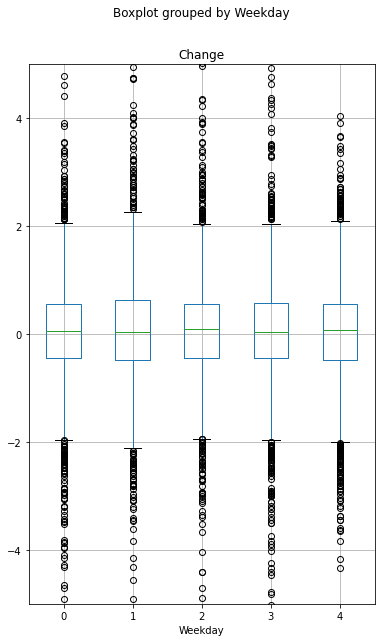

In [24]:
SP.boxplot(column='Change',by='Weekday', figsize = (6,10))
plt.ylim((-5,5))

# NASDAQ

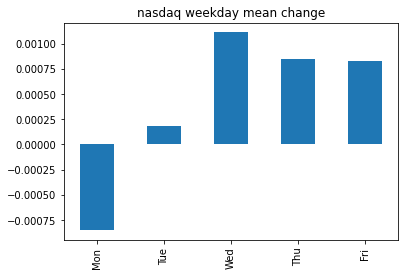

In [25]:
weekday = nasdaq.groupby('Weekday').mean() 
weekday.index = ['Mon','Tue','Wed','Thu','Fri']

weekday['Change'].plot(kind = 'bar', title = 'nasdaq weekday mean change',
                       figsize = (6,4))

월요일에 실제로 평균 수익률이 가장 낮다



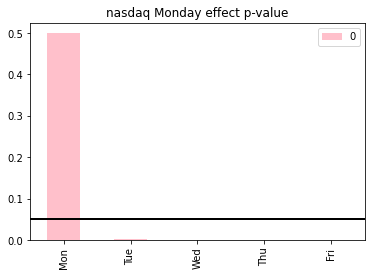

In [26]:
lst = []
for i in range(0, 5): 
  t_stat, p_value = stats.ttest_ind(nasdaq[nasdaq['Weekday'] == 0]['Change'], nasdaq[nasdaq['Weekday'] == i]['Change'], equal_var=True, alternative= 'less')
  lst.append(p_value)

lst = pd.DataFrame(lst)
lst.index = ['Mon','Tue','Wed','Thu','Fri']
lst.plot(kind='bar', title = 'nasdaq Monday effect p-value', color = 'pink',
         figsize = (6,4))
plt.axhline(0.05, color='black', lw=2)


In [27]:
t_stat, p_value = stats.ttest_ind(nasdaq[nasdaq['Weekday'] == 0]['Change'].dropna(), nasdaq[nasdaq['Weekday'] != 0]['Change'].dropna(), 
                                  equal_var= False, alternative= 'less')
print('p_value :', p_value)

p_value : 5.6768590430434257e-08


월요일과 다른 요일들의 평균 T-test 단측검정: p-value < 0.05
- ->월요일 수익률 평균 < 다른 요일 수익률 평균

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


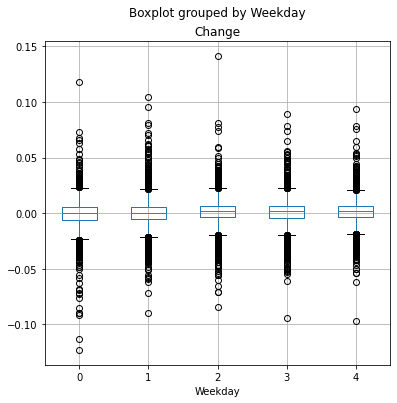

In [28]:
nasdaq.boxplot(column='Change',by='Weekday', figsize = (6,6))